# Agent-based model of tumor growth 

This Notebook was written by [Peter McHale](http://ccbs-76.bio.uci.edu/~petermchale/) and lives at [Github](https://github.com/petermchale/tumor). Follow [these instructions](http://jupyter.readthedocs.io/en/latest/install.html)
to execute the Notebook using Python. Otherwise, [view this Notebook](https://nbviewer.jupyter.org/github/petermchale/tumor/blob/master/demonstration.ipynb?flush_cache=true) (and its inline animations) in read-only mode using [Jupyter Notebook Viewer](http://nbviewer.jupyter.org). 

## Introduction

<span style="color:red">Some Motivation<span>

## The `tumor` package 

`tumor` is a Python package that contains a number of modules that permit tumor growth simulations.

In [1]:
import tumor_package
help(tumor_package)

Help on package tumor_package:

NAME
    tumor_package

PACKAGE CONTENTS
    animate
    energy
    ensemble
    events
    read
    self_renewal_probability
    tumor
    write

FILE
    /Users/ccbs/Desktop/tumor/tumor_package/__init__.py




In [2]:
# To make these modules visible to the Notebook, we must edit the python search path.
import os
repository_directory = os.getcwd() 
package_directory = repository_directory + '/tumor_package'
print('package directory:\t' + package_directory)
import sys
print('Python searches these paths when asked to import a module:')
sys.path.append(package_directory)
for path in sys.path: 
    print(path)

package directory:	/Users/ccbs/Desktop/tumor/tumor_package
Python searches these paths when asked to import a module:

/Users/ccbs/anaconda/lib/python35.zip
/Users/ccbs/anaconda/lib/python3.5
/Users/ccbs/anaconda/lib/python3.5/plat-darwin
/Users/ccbs/anaconda/lib/python3.5/lib-dynload
/Users/ccbs/anaconda/lib/python3.5/site-packages
/Users/ccbs/anaconda/lib/python3.5/site-packages/Sphinx-1.4.1-py3.5.egg
/Users/ccbs/anaconda/lib/python3.5/site-packages/aeosa
/Users/ccbs/anaconda/lib/python3.5/site-packages/setuptools-23.0.0-py3.5.egg
/Users/ccbs/anaconda/lib/python3.5/site-packages/IPython/extensions
/Users/ccbs/.ipython
/Users/ccbs/Desktop/tumor/tumor_package


To find out what each module does, use the `help` function:
```python 
import tumor 
help(tumor)
```

## Simulating tumor growth 

In [3]:
# Set up the code that will animate tumor growth

from read import read_into_dict
initialCondition = read_into_dict('data/initialCondition.in')
parameterValues = read_into_dict('data/parameterValues.in')

from animate import animate_tumor_growth_base
fig, anim = animate_tumor_growth_base(initialCondition, parameterValues, number_of_frames=400, random_seed=2)

To embed the matplotlib animation `anim` in the notebook, I follow [Louis Tiao's blog post](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/). This requires a recent version of [Matplotlib](http://matplotlib.org), and an animation writer called [ffmpeg](https://ffmpeg.org), which you can install by first installing [Homebrew](http://brew.sh) and then typing `brew install ffmpeg` in the `Terminal`.

In [4]:
# Check matplotlib and ffmpeg
import matplotlib as mpl
print('matplotlib version:\t' + mpl.__version__ + '\t (should be at least 1.5.1)')
from matplotlib import pyplot as plt
print('animation writer:\t' + plt.rcParams['animation.writer'] + '\t (should be ffmpeg)')

matplotlib version:	1.5.1	 (should be at least 1.5.1)
animation writer:	ffmpeg	 (should be ffmpeg)


In [5]:
# Simulate and visualize the tumor using a HTML5 video tag
from IPython.display import HTML
HTML(anim.to_html5_video())

In this movie, each disc represents a tumor cell. Color indicates whether the cell is in a dividing/replicating/cycling state (green) or a non-dividing/quiescent state (red). Time is measured in units of a cell cycle: the average time that elapses between a cell's birth and its division. 

You can see that the tumor grows when it is composed mainly of cycling cells early on, arrests its growth when it becomes composed mainly of quiescent cells, and finally starts to regress as cell death kicks in.

## The model

Having visualized the output of the model, let us now describe it in more detail. We suppose that the numbers of quiescent cells (Q-cells) influences the behavior of the cycling cells (C-cells). Specifically, at each cell cycle (on average) a C-cell chooses to divide or become quiescent with probabilities $p$ or $1-p$, respectively, that depend upon the number of Q-cells within the local neighborhood. 

<span style="color:red"> formulae<span>

## Statistical analysis of simulated tumor-growth data

In the movie shown above, negative feedback was chosen to have a spatial range that vastly exceeded the maximum size that the tumor could reach. Since negative feedback is initially responsible for arresting the growth of the tumor (i.e. before cell death kicks in), you might expect that reducing the spatial range of feedback would cause the tumor to expand exponentially. Simulations show, however, that negative feedback can arrest tumor growth even when the spatial range of feedback is smaller than the maximum tumor size. Fundamentally, this is possible because controlling the growth of the tumor early is more important than doing so late; in other words, errors have less impact when corrected early rather than late. 

Though changes in the spatial range of negative feedback don't necessarily abrogate growth control, they do lead to qualitative changes in the dynamics. To see this, generate an ensemble of tumor-growth time courses  by either running 

```python
from ensemble import generate_tumor_growth_trajectories_base
generate_tumor_growth_trajectories_base(initialCondition, parameterValues, number_realizations=1, random_seed=2, output_directory_name='data/')
```

in this Notebook; or by running 

```unix
cd data 
python ../tumor_package/ensemble.py
```

in `Terminal`.

Generating a large number of realizations of tumor growth takes a while. To speed up the execution of this Notebook, I will therefore use pre-existing data for long- and short-range negative feedback. Let's now read in these data and visually compare the simulated tumor-growth time courses.

In [6]:
# Read in data 

class Data(object): 
    """Container for simulation data"""
    
    def __init__(self, time_points, number_C_cells, number_Q_cells): 
    
        self.time_points = time_points
        self.number_C_cells = number_C_cells
        self.number_Q_cells = number_Q_cells
        self.total_number_cells = self.number_C_cells + self.number_Q_cells

import numpy as np
        
def create_data_object_from_file(data_file_name):
    
    with np.load(data_file_name) as data_set:
        time_points = data_set['time_points']
        number_C_cells = data_set['number_C_cells']
        number_Q_cells = data_set['number_Q_cells']
    
    return Data(time_points, number_C_cells, number_Q_cells)

data_short = create_data_object_from_file('data/short_range_negative_feedback/tumor_time_courses.npz')
data_long = create_data_object_from_file('data/long_range_negative_feedback/tumor_time_courses.npz')

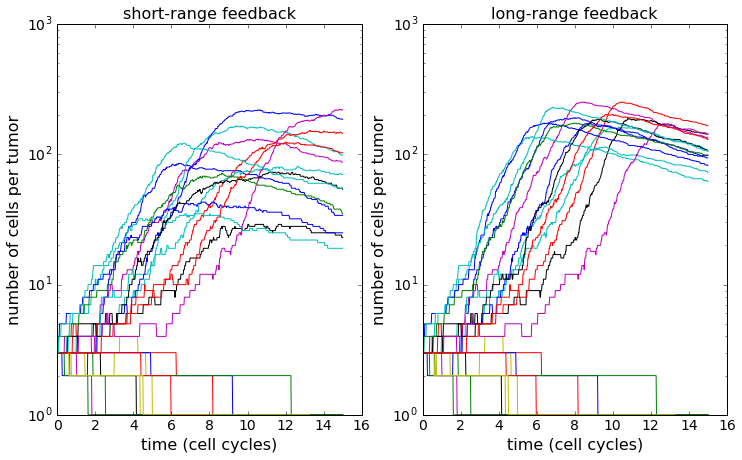

In [7]:
# Visually compare time courses for short- and long-range negative feedback

%matplotlib inline

fig = plt.figure(figsize=(12, 7), facecolor='w')
fontsize = 16
fontsize_tick = 14

def plot_time_courses(data, axis_number, title):

    number_subplot_rows, number_subplot_columns = 1, 2
    ax = fig.add_subplot(number_subplot_rows, number_subplot_columns, axis_number)
    ax.plot(data.time_points.T, data.total_number_cells.T, linewidth=1)
    ax.set_xlabel('time (cell cycles)', fontsize=fontsize)
    ax.set_ylabel('number of cells per tumor', fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize_tick)
    ax.set_yscale('log')
    
def thin(data, step): 
    """down-sample time-course data"""
    
    def thin_base(arr):
        return arr[1::step, :]
    
    return Data(thin_base(data.time_points), thin_base(data.number_C_cells), thin_base(data.number_Q_cells))
    
step = 4
plot_time_courses(thin(data_short, step), axis_number=1, title='short-range feedback')
plot_time_courses(thin(data_long, step), axis_number=2, title='long-range feedback')

Each color represents a single realization of a growing tumor. Note that the inherent stochasticity in the model leads to widely varying tumor-growth trajectories (left panel). Increasing the spatial range of the negative feedback averages out some of this stochasticity making the large-number part of the trajectories more deterministic (right panel). In particular, you can clearly see that many trajectories possess an early exponential growth phase (due to the tumors being mainly composed of self-replicating C-cells) and a late exponential regression phase (during which tumors are composed mainly of Q-cells that are killed off at a constant rate per cell).  

You can also see from these time courses (right panel) that there is a bifurcation: some tumors survive the initial fluctuations in tumor size to grow deterministically (though they eventually regress) while the initial fluctuations prevent others from ever entering the deterministic growth phase. These 'unlucky' tumors &mdash; doomed to regression from their inception &mdash; are not rare. In fact, as many as half of the tumors are destined to 'extinguish', as the following histogram shows...

number of samples = 100


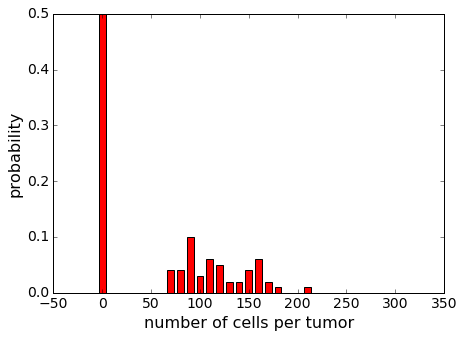

In [8]:
# plot distribution of number of cells per tumor at a single time point

def plot_distribution(data, bin_width=10, time_at_which_to_plot_histogram=14):

    index_at_which_to_plot_histogram = (np.abs(data.time_points[0, :] - time_at_which_to_plot_histogram)).argmin()
    total_number_cells_at_time_point = data.total_number_cells[:, index_at_which_to_plot_histogram]

    fig = plt.figure(figsize=(7, 5), facecolor='w')
    ax = fig.add_subplot(111)
    x_max = max(data.total_number_cells.flatten()) + 2*bin_width    
    bin_edges = np.arange(-0.5*bin_width, x_max, bin_width)
    counts = np.histogram(total_number_cells_at_time_point, bin_edges)[0]
    counts = np.array(counts)
    probabilities = counts/float(sum(counts))
    rectangle_width = 0.7 * bin_width
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    rectangle_left_edges = bin_centers - 0.5*rectangle_width
    ax.bar(left=rectangle_left_edges, height=probabilities, width=rectangle_width, color='red')
    ax.set_xlabel('number of cells per tumor', fontsize=fontsize)
    ax.set_ylabel('probability', fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize_tick)
    print('number of samples = ' + str(len(total_number_cells_at_time_point)))
    
plot_distribution(data_long)

The following interactive visualization was inspired by [this mpld3 example](http://mpld3.github.io/examples/custom_plugin.html). If your Python distribution doesn't already have `mpld3`, you'll need to install it, e.g., by executing
``` 
pip install mpld3
``` 
in `Terminal`. `mpld3` allows the user to combine [Matplotlib](http://matplotlib.org/), the popular Python-based graphing library, and [D3](https://d3js.org), the popular Javascript library for creating interactive data visualizations for the web.  

In [9]:
# adjust the Notebook display properties so that mpld3 will be used to display figures
from mpld3 import enable_notebook
enable_notebook()

# define a 'plugin' to add interactive behavior to matplotlib plots rendered in d3
from mpld3 import plugins, utils
class LinkedView(plugins.PluginBase):
    """Link scatter plot to two line plots"""

    JAVASCRIPT = """
    mpld3.register_plugin("linkedview", LinkedViewPlugin);
    LinkedViewPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LinkedViewPlugin.prototype.constructor = LinkedViewPlugin;
    LinkedViewPlugin.prototype.requiredProps = ["idpts", "idline1", "data1", "idline2", "data2"];
    LinkedViewPlugin.prototype.defaultProps = {}
    function LinkedViewPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LinkedViewPlugin.prototype.draw = function(){
      var pts = mpld3.get_element(this.props.idpts);
      var line1 = mpld3.get_element(this.props.idline1);
      var data1 = this.props.data1;
      var line2 = mpld3.get_element(this.props.idline2);
      var data2 = this.props.data2;

      function mouseover(d, i){
        line1.data = data1[i];
        line2.data = data2[i];

        line1.elements().transition()
            .attr("d", line1.datafunc(line1.data))
            .style("stroke", this.style.fill);
        line2.elements().transition()
            .attr("d", line2.datafunc(line2.data))
            .style("stroke", this.style.fill);
      }
      pts.elements().on("mouseover", mouseover);
    };
    """

    def __init__(self, points, line1, linedata1, line2, linedata2):
        if isinstance(points, mpl.lines.Line2D):
            suffix = "pts"
        else:
            suffix = None

        self.dict_ = {"type": "linkedview",
                      "idpts": utils.get_id(points, suffix),
                      "idline1": utils.get_id(line1),
                      "data1": linedata1,
                      "idline2": utils.get_id(line2),
                      "data2": linedata2}

Having set up the interactive data visualization tools, we use them to 
<span style="color:red"> analyze our data...<span>

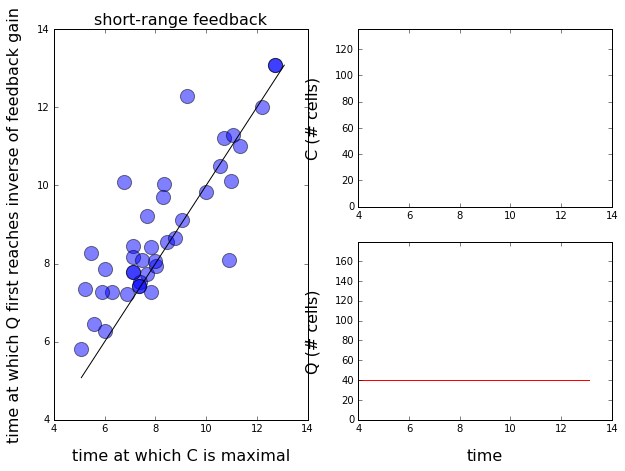

In [10]:
def remove_low_trajectories(data, inverse_gain): 
    """remove time-courses in which number of Q-cells never reaches inverse feedback gain"""
    
    tj = data.number_Q_cells.max(axis=1) > inverse_gain
    
    def thin_base(arr, indices):
        return arr[indices, :]
    
    return Data(thin_base(data.time_points, tj), thin_base(data.number_C_cells, tj), thin_base(data.number_Q_cells, tj))

def extract_scatter(data, inverse_gain): 
    """extract data for scatter plot"""
    
    # get a list of indices of all trajectories
    number_trajectories, number_time_points = data.time_points.shape
    trajectory_indices = list(range(number_trajectories)) # range is a generator, not a list, in Python 3.x

    # for each trajectory, compute the time at which the number of C-cells (first) reaches its maximum
    time_indices = data.number_C_cells.argmax(axis=1)
    times_C_max = data.time_points[trajectory_indices, time_indices]

    # for each trajectory, compute the first time at which the number of Q-cells reaches the inverse of the negative feedback gain
    time_indices = np.argmax(data.number_Q_cells>inverse_gain, axis=1)
    times_Q_inverseGain = data.time_points[trajectory_indices, time_indices]

    return times_C_max, times_Q_inverseGain

def process_data(data, inverse_gain): 
    """remove time courses and extract scatter data"""
    
    data = remove_low_trajectories(data, inverse_gain)
    times_C_max, times_Q_inverseGain = extract_scatter(data, inverse_gain)
    return times_C_max, times_Q_inverseGain, data
    
def interactive_scatter_plot(data, inverse_gain, title_string): 
    """use mpld3 to interactively visualize correlations"""
    
    times_C_max, times_Q_inverseGain, data = process_data(data, inverse_gain)
    
    # set up the figure
    fig = plt.figure(figsize=(10, 7), facecolor='w')
    ax1 = plt.subplot2grid((2,2), (0,0), rowspan=2)
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,1))
    
    # scatter plot
    points = ax1.scatter(times_C_max, times_Q_inverseGain, s=200, alpha=0.5)
    ax1.set_xlabel('time at which C is maximal', labelpad=15, fontsize=fontsize)
    ax1.set_ylabel('time at which Q first reaches inverse of feedback gain', labelpad=15, fontsize=fontsize)
    ax1.set_title(title_string, fontsize=fontsize)
    min_time = np.amin([times_C_max.min(), times_Q_inverseGain.min()])
    max_time = np.amax([times_C_max.max(), times_Q_inverseGain.max()])
    ax1.plot([min_time, max_time], [min_time, max_time], color='black')

    def line_plot(axis_object, y_data, ylabel_string):
        """set up axis and data needed to generate time courses"""
        
        # line plot 
        t = data.time_points[0,:]  # necessary for mpld3 to update line plots correctly
        lines = axis_object.plot(t, 0*t, '-w', lw=3, alpha=0.5)
        line = lines[0]
        axis_object.set_xlim(ax1.get_xlim())
        axis_object.set_ylim(0, y_data.max())
        axis_object.set_ylabel(ylabel_string, labelpad=15, fontsize=fontsize)

        # line data
        linedata = np.dstack((data.time_points, y_data)).tolist()

        return line, linedata
    
    line_2, linedata_2 = line_plot(ax2, y_data=data.number_C_cells, ylabel_string='C (# cells)')
    line_3, linedata_3 = line_plot(ax3, y_data=data.number_Q_cells, ylabel_string='Q (# cells)')
    ax3.set_xlabel('time', labelpad=15, fontsize=fontsize)
    ax3.plot([0, max_time], [inverse_gain, inverse_gain], color='red')
    
    # use mpld3 to connect scatter and line plots interactively
    plugins.connect(fig, LinkedView(points, line_2, linedata_2, line_3, linedata_3))

inverse_gain = 1.0/0.025 # 1.0/parameterValues['negative_gain_Q'] 
interactive_scatter_plot(data_short, inverse_gain, 'short-range feedback')

Mousing over points in the scatter plot (left), and observing the corresponding stochastic time courses (right), shows that those points on the diagonal of the scatter plot correspond to realizations in which the number of Q-cells rose quickly through the threshold value (inverse of negative feedback gain; indicated by red line). To the extent that the failure of cell numbers to rise quickly is due to stochastic fluctuations, one might expect that averaging out those fluctuations by extending the spatial range of feedback ought to reduce the scatter about the diagonal in the scatter plot (left). This turns out to be the case:

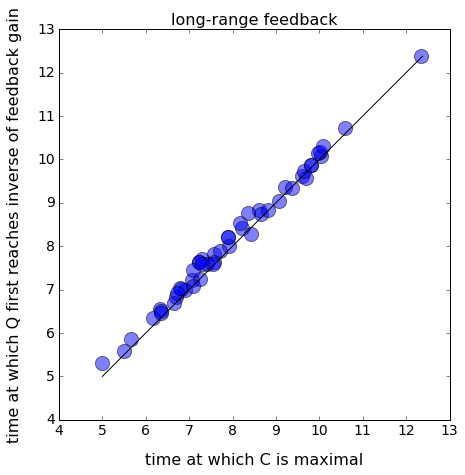

In [11]:
from mpld3 import disable_notebook
disable_notebook()

def scatter_plot(data, inverse_gain, title_string): 
    
    times_C_max, times_Q_inverseGain, data = process_data(data, inverse_gain)

    fig = plt.figure(figsize=(7,7), facecolor='w')
    ax = plt.subplot(111)
    ax.scatter(times_C_max, times_Q_inverseGain, s=200, alpha=0.5)
    ax.set_xlabel('time at which C is maximal', labelpad=15, fontsize=fontsize)
    ax.set_ylabel('time at which Q first reaches inverse of feedback gain', labelpad=15, fontsize=fontsize)
    ax.set_title(title_string, fontsize=fontsize)
    min_time = np.amin([times_C_max.min(), times_Q_inverseGain.min()])
    max_time = np.amax([times_C_max.max(), times_Q_inverseGain.max()])
    ax.plot([min_time, max_time], [min_time, max_time], color='black')
    ax.tick_params(axis='both', which='major', labelsize=fontsize_tick)

inverse_gain = 1.0/0.025 # 1.0/parameterValues['negative_gain_Q'] 
scatter_plot(data_long, inverse_gain, 'long-range feedback')